In [1]:
print('hi')

hi


In [40]:
# Converted Python code from MATLAB files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gradient function equivalent to df0.m
def grad_f0(x1, x2):
    """
    This function returns the gradient of the objective function in Problem 1.
    """
    grad = [2.0 * x1 + 3.0 * x2 + 2.0, 3.0 * x1 + 18.0 * x2 - 5.0]
    return grad

# Objective function equivalent to f0.m
def f0(x1, x2):
    """
    This function returns the value of the objective function in Problem 1.
    """
    return x1 * x1 + 3.0 * x1 * x2 + 9.0 * x2 * x2 + 2.0 * x1 - 5.0 * x2

# Topology data equivalent to topology.m
Num_Links = 12
Num_Flows = 7
Max_Links_On_Path = 4

Link_Capacity = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0])
Flow_Weight = np.array([1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0])

Flow_Path = np.array([
    [3, 9, -1, -1],
    [4, 9, -1, -1],
    [3, 10, -1, -1],
    [4, 10, -1, -1],
    [5, 8, -1, -1],
    [5, 9, -1, -1],
    [1, 6, 11, -1]
])

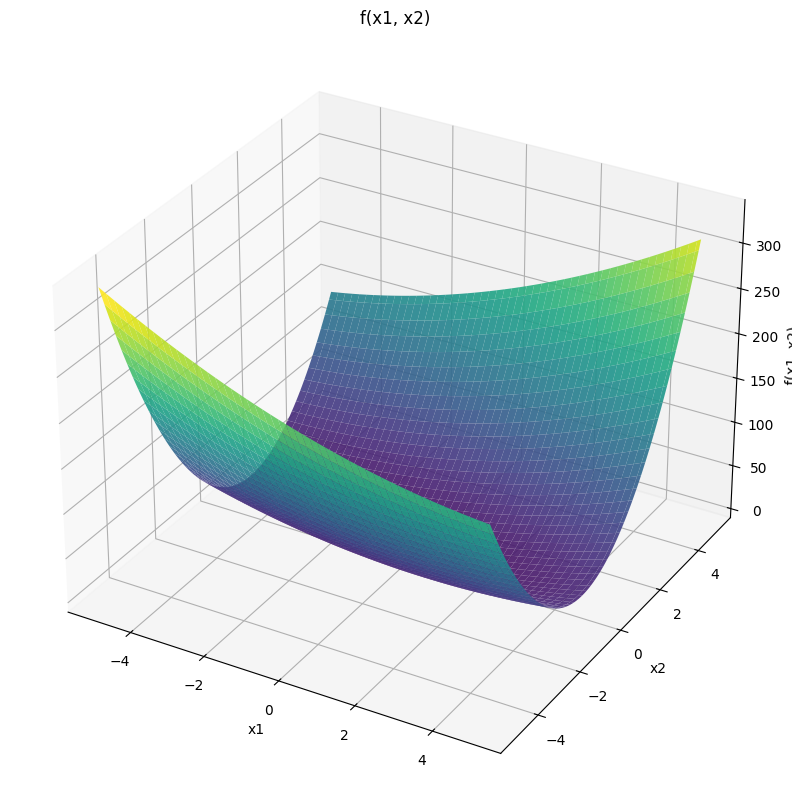

In [29]:
def plot_3d_f0(filename, save=True):
    x1_vals = np.linspace(-5, 5, 100)
    x2_vals = np.linspace(-5, 5, 100)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
    f_vals = f0(x1_grid, x2_grid)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1_grid, x2_grid, f_vals, cmap='viridis', alpha=0.9)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title('f(x1, x2)')
    if save:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Call the function to plot
plot_3d_f0('3d_f0.png')

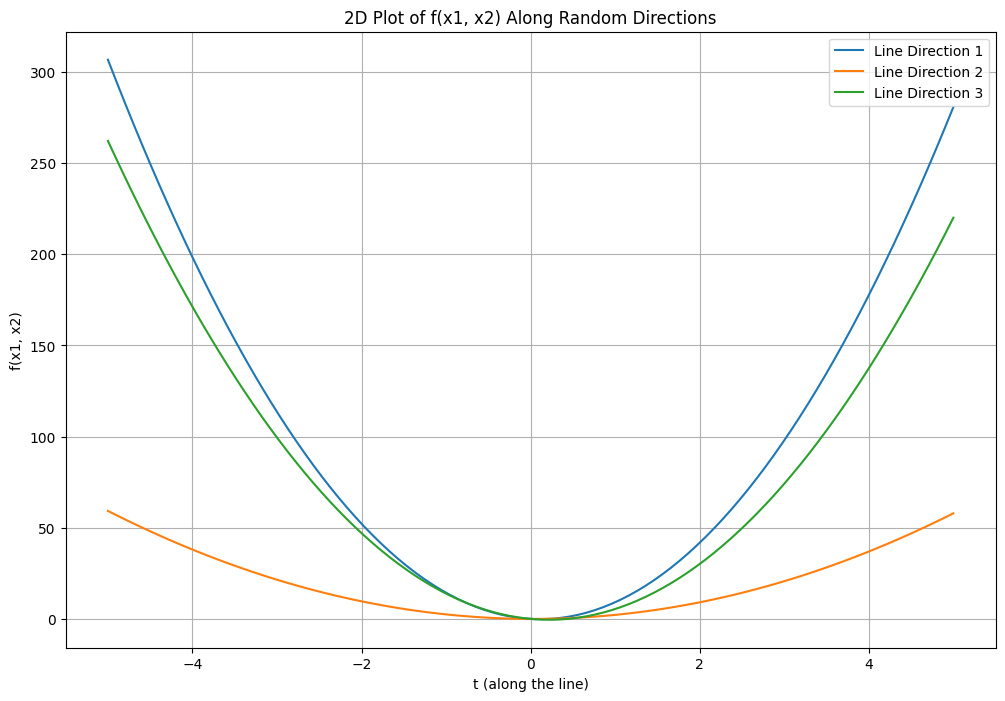

In [39]:
def plot_2d_lines_from_start(starting_point=None, filename='2d_lines.png', save=True):
    # Define the starting point
    starting_point = np.array([0, 0]) if starting_point is None else starting_point

    directions = [np.random.randn(2) for _ in range(3)]
    t_vals = np.linspace(-5, 5, 100)
    plt.figure(figsize=(12, 8))

    for i, direction in enumerate(directions):
        x1_line = starting_point[0] + t_vals * direction[0]
        x2_line = starting_point[1] + t_vals * direction[1]
        f_line_vals = f0(x1_line, x2_line)

        plt.plot(t_vals, f_line_vals, label=f'Line Direction {i+1}')

    plt.xlabel('t (along the line)')
    plt.ylabel('f(x1, x2)')
    plt.title('2D Plot of f(x1, x2) Along Random Directions')
    plt.legend()
    plt.grid()
    if save:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()
    
plot_2d_lines_from_start(np.array([0, 0]))

In [30]:
directions

[array([ 0.49671415, -0.1382643 ]),
 array([0.64768854, 1.52302986]),
 array([-0.23415337, -0.23413696])]

array([1000.,  800.])

In [171]:
def gradient_descent(gamma):
    w_holder = []
    w = np.zeros(2, dtype=float)
    for _ in n_steps:
        w_holder.append(w)
        loss = f0(w[0], w[1])
        grad = grad_f0(w[0], w[1])
        w = w - gamma * grad
    return np.array(w_holder)

In [303]:
n_steps = list(range(1, 301))
x_history =gradient_descent(np.array(0.05))

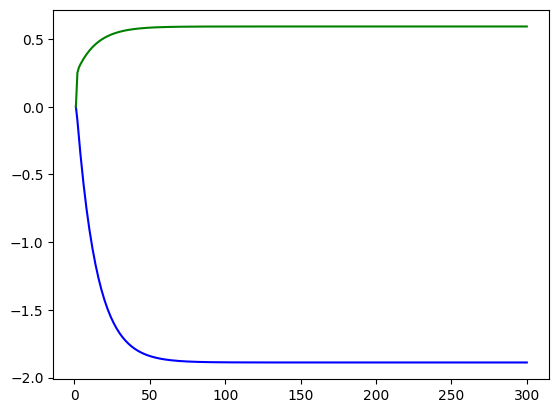

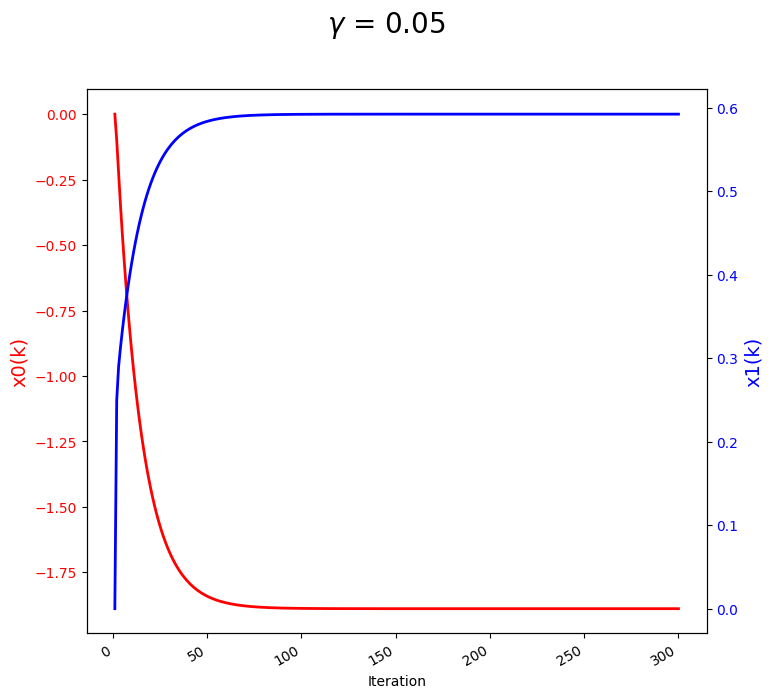

In [304]:
plt.plot(n_steps, x_history[:, 0], color="b", label="d")
plt.plot(n_steps, x_history[:, 1], color="g", label="dd")


x1color = "r"
x2color = "b"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(n_steps, x_history[:, 0], color=x1color, lw=2)
ax2.plot(n_steps, x_history[:, 1], color=x2color, lw=2)

ax1.set_xlabel("Iteration")
ax1.set_ylabel("x0(k)", color=x1color, fontsize=14)
ax1.tick_params(axis="y", labelcolor=x1color)

ax2.set_ylabel("x1(k)", color=x2color, fontsize=14)
ax2.tick_params(axis="y", labelcolor=x2color)

fig.suptitle("$\gamma$ = 0.05", fontsize=20)
fig.autofmt_xdate()

plt.savefig('xs_gamma=0.05.png', bbox_inches='tight')

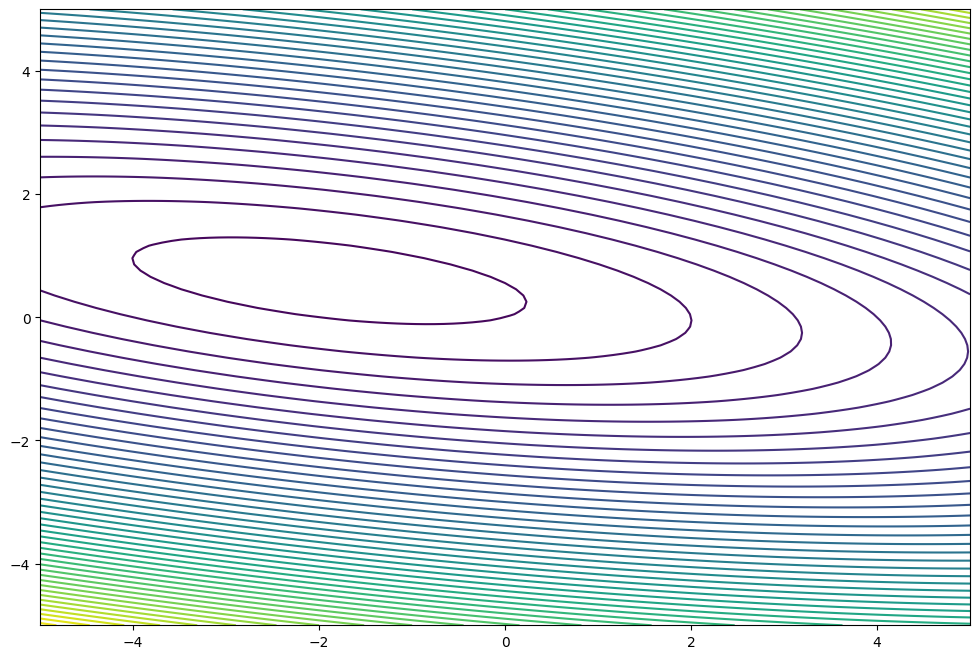

/tmp/ipykernel_1089418/2194633126.py:19: RuntimeWarning: overflow encountered in scalar multiply
  return x1 * x1 + 3.0 * x1 * x2 + 9.0 * x2 * x2 + 2.0 * x1 - 5.0 * x2


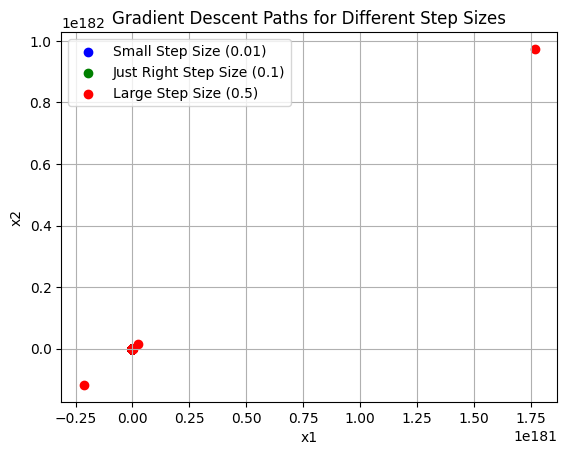

In [153]:
def plot_gradient_descent():
    step_sizes = [0.01, 0.1, 0.5]  # Small, just right, and large step sizes
    labels = ["Small Step Size (0.01)", "Just Right Step Size (0.1)", "Large Step Size (0.5)"]
    colors = ["b", "g", "r"]

    plt.figure(figsize=(12, 8))

    # Create a contour plot of the objective function
    x1_vals = np.linspace(-5, 5, 100)
    x2_vals = np.linspace(-5, 5, 100)
    x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
    f_vals = f0(x1_grid, x2_grid)
    plt.contour(x1_grid, x2_grid, f_vals, levels=50, cmap='viridis')
    plt.show()

    # Plot the evolution of x1 and x2 for different step sizes
    for step_size, label, color in zip(step_sizes, labels, colors):
        x_history = gradient_descent(np.array(step_size))
        plt.scatter(x_history[:, 0], x_history[:, 1], marker='o', color=color, label=label)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Gradient Descent Paths for Different Step Sizes')
    plt.legend()
    plt.grid()
    plt.show()


step_sizes = np.array([0.15, 10],dtype=np.float64)
plot_gradient_descent()